In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

# Preliminary look at the data

In [ ]:
# the next six cells are just taking a preliminary look at the source CSVs
# to determine which columns might serve as primary keys, etc.

In [3]:
# import data and compare counts to counts of unique values
look_df = pd.read_csv('data\departments.csv')
print(f'count:\n{look_df.count()}\n')
print(f'nunique:\n{look_df.nunique()}\n')

# all values are unique, and dept_no is a suitable primary key

count:
dept_no      9
dept_name    9
dtype: int64

nunique:
dept_no      9
dept_name    9
dtype: int64



In [4]:
# import data and compare counts to counts of unique values
look_df = pd.read_csv('data\dept_emp.csv')
print(f'count:\n{look_df.count()}\n')
print(f'nunique:\n{look_df.nunique()}\n')

# need to add an id field here to serve as primary key

count:
emp_no       331603
dept_no      331603
from_date    331603
to_date      331603
dtype: int64

nunique:
emp_no       300024
dept_no           9
from_date      6393
to_date        6085
dtype: int64



In [5]:
# import data and compare counts to counts of unique values
look_df = pd.read_csv('data\dept_manager.csv')
print(f'count:\n{look_df.count()}\n')
print(f'nunique:\n{look_df.nunique()}\n')

# at the moment, emp_no could serve as primary key
# could a manager move from one dept to another, though?
# could they create a new departement and move a manager?
# in that case, you'd have a new row with a duplicate emp_no
# moving forward, it could be better to have an id field as primary key

count:
dept_no      24
emp_no       24
from_date    24
to_date      24
dtype: int64

nunique:
dept_no       9
emp_no       24
from_date    16
to_date      16
dtype: int64



In [6]:
# import data and compare counts to counts of unique values
look_df = pd.read_csv('data\employees.csv')
print(f'count:\n{look_df.count()}\n')
print(f'nunique:\n{look_df.nunique()}\n')

# emp_no is unique and is a suitable primary key

count:
emp_no        300024
birth_date    300024
first_name    300024
last_name     300024
gender        300024
hire_date     300024
dtype: int64

nunique:
emp_no        300024
birth_date      4750
first_name      1276
last_name       1638
gender             2
hire_date       5434
dtype: int64



In [7]:
# import data and compare counts to counts of unique values
look_df = pd.read_csv('data\salaries.csv')
print(f'count:\n{look_df.count()}\n')
print(f'nunique:\n{look_df.nunique()}\n')

# at the moment emp_no could serve as primary key
# seems weird, though -- no history of an employee getting a raise?

count:
emp_no       300024
salary       300024
from_date    300024
to_date      300024
dtype: int64

nunique:
emp_no       300024
salary        50355
from_date      5481
to_date        5568
dtype: int64



In [8]:
# import data and compare counts to counts of unique values
look_df = pd.read_csv(r'data\titles.csv')
print(f'count:\n{look_df.count()}\n')
print(f'nunique:\n{look_df.nunique()}\n')

# need to add an id column to serve as primary key
# I had a problem reading this file. I had to prepend the path string with carriage return character. Weird.

count:
emp_no       443308
title        443308
from_date    443308
to_date      443308
dtype: int64

nunique:
emp_no       300024
title             7
from_date      6393
to_date        5888
dtype: int64



# The bonus analyses

In [12]:
# create the engine object
engine = create_engine('postgresql://postgres:<password_here>@localhost:5432/Homework')

# create dataframes
with engine.connect() as connection:
    salaries_df = pd.read_sql_query('select * from "salaries"',con=engine)
    titles_df = pd.read_sql_query('select * from "titles"',con=engine)

In [13]:
# merge/join the two dataframes
merged_df = pd.merge(titles_df,salaries_df, on = ('emp_no','emp_no'))

In [14]:
# group by title and look at the average salaries
avg_salaries = merged_df.groupby('title')['salary'].mean()
avg_salaries

title
Assistant Engineer    48493.204786
Engineer              48539.781423
Manager               51531.041667
Senior Engineer       48506.751806
Senior Staff          58503.286614
Staff                 58465.271904
Technique Leader      48580.505772
Name: salary, dtype: float64

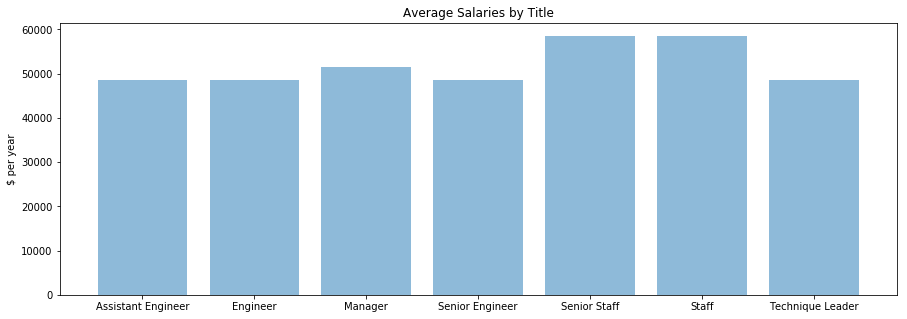

In [15]:
# set the labels for the bars
titles = avg_salaries.index
# set the positions for ticks and labels
position = np.arange(len(titles))
# set the values to plot
avg_salary = avg_salaries

# make sure there's enough room
plt.figure(figsize = [15,5])
# create the plot
plt.bar(position, avg_salary, align='center', alpha=0.5)
# add ricks and labels
plt.xticks(position, titles)
# label the y-axis
plt.ylabel('$ per year')
# add a title
plt.title('Average Salaries by Title')

#show the plot
plt.show()

In [ ]:
# this is not a real salary structure!